In [1]:
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: TkAgg


In [6]:
# Vider la bouteille x dans la bouteille y connaissant l'état (state) et
#le volume maximum pour chaque bouteille (vmax). Retourne None si impossible 
def change_state(x:int, y:int, state:tuple, vmax=(10,5,6)):
    
    new_state = list(state)
    
    # Calcul de e : le volume de liquide à déplacer

    e_in= (vmax[y] - new_state[y])
    e_out = state[x] 
    e = min(e_in, e_out)
    
    
    if e == 0 : 
        return None
    
    if new_state[x] - e < 0:
        return None
    
    if new_state[x] == 0:
        return None
    
    if new_state[y] + e > vmax[y]:
        return None
         
    new_state[x] -= e
    new_state[y] += e
    
    return tuple(new_state)
    
# exemple 
print(change_state(0,1,(10,1,0)))   

(6, 5, 0)


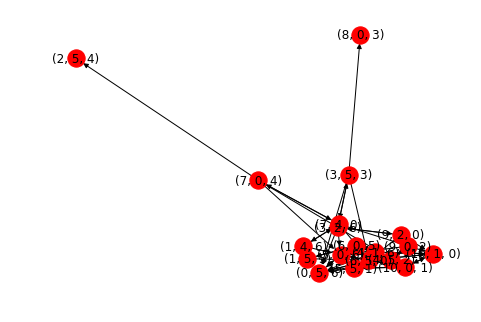

In [9]:
# Creation d'un graphe dirigé 
graph = nx.DiGraph()

# Liste de toutes les transitions possibles
# Bouteilles 0 dans 1, Bouteille 1 dans 2 etc ...
choices = list(itertools.permutations([0,1,2],2))

# Creation du premier noeud avec l'état 10,1,0
parent = (10,1,0)
graph.add_node(parent)

# Construction du graphe sur 7 itérations 
depth = 0
while depth < 7:
    # Pour 
    parents = list(graph.nodes())
    for parent in parents: 
        for i in choices:
            child = change_state(*i, parent)
            if child is not None:
                graph.add_node(child)
                graph.add_edges_from([(parent,child)], label=str(i))
    
    depth +=1

#graph = nx.relabel_nodes(graph, lambda x: str(x))
#graph = graph.reverse()
nx.draw(graph, with_labels=True)
#nx.write_gml(graph,"glass3.gml")

# Résultats

In [10]:
for node in nx.shortest_path(graph,source=(10,1,0),target=(8,0,3)):
    print(node)

(10, 1, 0)
(4, 1, 6)
(4, 5, 2)
(9, 0, 2)
(9, 2, 0)
(3, 2, 6)
(3, 5, 3)
(8, 0, 3)
